1. Find the proper libraries/packages in your coding environment to perform the LASSO and Ridge regressions on the ORL face dataset (use the same gender labels created in your HW02).

a. Select the lambda associated with the minimal MSE fit and compare the results with that of your
stepwise regression in HW02.

In [26]:
from PIL import Image
import numpy as np
from numpy import array
from tkinter import _flatten
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge 
import math
import matplotlib.pyplot as plt
import os


In [27]:
import numpy

# 1 - 0, 2 - 1, 3 - 1, 4 - 1, 5 - 1, 6 - 1, 7 - 1, 8 - 0, 9 - 1, 10 - 0, 11 - 1, 12 - 0, 13 - 1, 14 - 1, 15 - 1
# 16 - 1, 17 - 1, 18 - 1, 19 - 1, 20 - 1, 21 - 1, 22 - 1, 23 - 1, 24 - 1, 25 - 1, 26 - 1, 27 - 1, 28 - 1, 29 - 1, 30 - 1
# 31 - 1, 32 - 0, 33 - 1, 34 - 1, 35 - 1, 36 - 1, 37 - 1, 38 - 1, 39 - 1, 40 - 1  
gender = [0, 1, 1, 1, 1, 1, 1, 0, 1, 0,1, 0, 1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1]
len(gender)

final = []
for i in gender:
  if i == 0:
    for j in range(0,10):
      final.append(0)
    #new_list = [0,0,0,0,0,0,0,0,0,0]
  else:
    for j in range(0,10):
      final.append(1)


 
gender = np.asarray(final)
gender = np.expand_dims(gender, axis=1)
gender.shape




(400, 1)

In [28]:
from PIL import Image


def load_images_from_folder(folder):
  i = 1
  for filename in os.listdir(folder):
    im = Image.open(os.path.join(folder,filename))
    data = np.array(im)
    flattened = data.flatten()
    reshape_fla = np.expand_dims(flattened, axis=0)
    if i == 1:
      final = reshape_fla
      i = 2
    else:
      final = np.vstack((final,reshape_fla))

  return final


pixels = load_images_from_folder('/content/drive/MyDrive/Colab Notebooks/homework_5/faces')

pixels.shape

(400, 2576)

In [29]:
y = gender
X = pixels

Streaming output truncated to the last 5000 lines.
Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you w

Min MSE Lasso 0.109375
Alpha with small value Lasso 0.00311


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skle

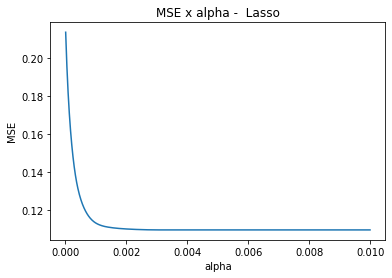

In [30]:
#Lasso 

MSE = []
alphas = []
i = 0 
for i in range(1,1000):
  alpha = i/100000
  lasso = Lasso(alpha = alpha,normalize = True)  
  lasso.fit(X, y) 
  MSE.append(np.mean((lasso.predict(X) - y) ** 2)) 
  alphas.append(alpha)

print("Min MSE Lasso", min(MSE))
index_alpha = MSE.index(min(MSE))
print("Alpha with small value Lasso", alphas[index_alpha])
best_alpha_lasso = alphas[index_alpha]

plt.title("MSE x alpha -  Lasso")
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.plot(alphas,MSE)

Streaming output truncated to the last 5000 lines.
Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the d

Min MSE 1.5319876954603953e-10
Alpha with small value Ridge 1e-05


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


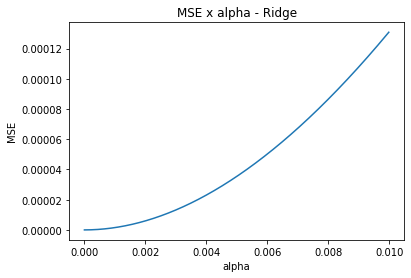

In [31]:
#Ridge 

MSE = []
alphas = []
i = 0 
for i in range(1,1000):
  alpha = i/100000
  ridge = Ridge(alpha = alpha,normalize = True) 
  ridge.fit(X, y) 
  MSE.append(np.mean((ridge.predict(X) - y) ** 2)) 
  alphas.append(alpha)

print("Min MSE", min(MSE))
index_alpha = MSE.index(min(MSE))
print("Alpha with small value Ridge", alphas[index_alpha])




plt.title("MSE x alpha - Ridge")
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.plot(alphas,MSE)

In [32]:
# stepwise regression

import statsmodels.api as sm
import numpy as np

X_reg = sm.add_constant(X)
model = sm.OLS(y,X_reg)
results = model.fit()
MRS = np.mean((results.predict(X_reg) - y) ** 2)

print(MRS)

0.21874999999999978


Using LASSO, and Ridge we can get a minor MRS comparing to stepwise regression.

In [33]:
lasso = Lasso(alpha = 0.001, normalize = True) 
lasso.fit(X, y)
n = np.sum(lasso.coef_ != 0)


pixels = []

for i in range(len(lasso.coef_)):
  if lasso.coef_[i] != 0: 
    pixels.append(i)

print(pixels)

[173, 698, 924, 1009, 1028, 1052, 1093, 1118, 1132, 1142, 1153, 1165, 1169, 1191, 1240, 1355, 1400, 1408, 1538, 1581, 1611, 1657, 1673, 1707, 1713, 1787, 1795, 1812, 1845, 1906, 2085, 2431, 2539, 2566]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


In [34]:
import math

x_pos = []
y_pos = []
width = 46

for pixel in pixels:
  y_posi = pixel//width 
  x_posi = (pixel - (width*y_posi)) + 1 
  x_pos.append(x_posi)
  y_pos.append(y_posi)

x_pos.append(46)
y_pos.append(56)

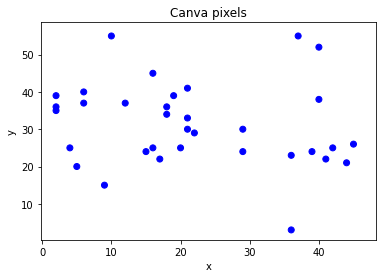

In [35]:
import matplotlib.pyplot as plt

colors = []

for i in range(0,len(pixels)):
  colors.append("b")

colors.append("w")


plt.scatter(x_pos,y_pos, c=colors)

plt.title('Canva pixels')
plt.xlabel('x')
plt.ylabel('y')

plt.show()